In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
100% 262k/262k [00:00<00:00, 827kB/s]
100% 262k/262k [00:00<00:00, 826kB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/credit-card-customer-churn-prediction.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [21]:
X=df.drop(columns=['Exited'])
Y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
X_train.shape

(8000, 11)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [51]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5580 - accuracy: 0.7566 - val_loss: 0.4713 - val_accuracy: 0.8069
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.7956 - val_loss: 0.4277 - val_accuracy: 0.8175
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4382 - accuracy: 0.8077 - val_loss: 0.4133 - val_accuracy: 0.8194
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8131 - val_loss: 0.4032 - val_accuracy: 0.8294
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4160 - accuracy: 0.8200 - val_loss: 0.3938 - val_accuracy: 0.8344
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8316 - val_loss: 0.3811 - val_accuracy: 0.8419
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3903 - accuracy: 0.8395 - val_loss: 0.3707 - val_accuracy: 0.8431

In [53]:
model.layers[2].get_weights()

[array([[-0.9649374 ],
        [-1.7572602 ],
        [-0.5969966 ],
        [-0.5367373 ],
        [ 0.9267255 ],
        [-0.23438327],
        [ 0.98832065],
        [-1.2785789 ],
        [ 0.99070674],
        [-0.11372918],
        [ 1.6401424 ]], dtype=float32),
 array([0.26365086], dtype=float32)]

In [54]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [55]:
y_pred=np.where(y_log>0.5,1,0)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8575

In [52]:
import matplotlib.pyplot as plt

In [57]:
history.history

{'loss': [0.5580297708511353,
  0.4602019786834717,
  0.4382484555244446,
  0.42728644609451294,
  0.4160465896129608,
  0.403827965259552,
  0.3902931213378906,
  0.37829986214637756,
  0.36775845289230347,
  0.3597967028617859,
  0.35454386472702026,
  0.35029980540275574,
  0.3475942611694336,
  0.3456502854824066,
  0.3437093496322632,
  0.3427438735961914,
  0.3411545157432556,
  0.34131717681884766,
  0.33959728479385376,
  0.33920004963874817,
  0.3383074700832367,
  0.33758997917175293,
  0.3369442820549011,
  0.33680710196495056,
  0.3360055983066559,
  0.33574405312538147,
  0.3356107771396637,
  0.3352791965007782,
  0.3348645865917206,
  0.33413243293762207,
  0.33381137251853943,
  0.33347195386886597,
  0.3329024910926819,
  0.33280444145202637,
  0.3326530456542969,
  0.3321498930454254,
  0.3321693539619446,
  0.3319719433784485,
  0.33130645751953125,
  0.33119839429855347,
  0.3314681351184845,
  0.3310060203075409,
  0.33081763982772827,
  0.3300708830356598,
  0.330

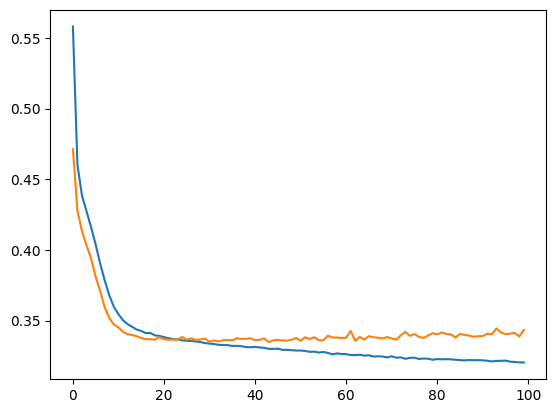

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

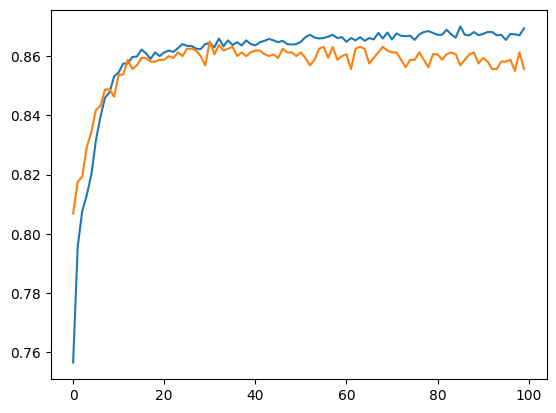

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])